# 4. Searching for similar weather patterns

## 4.1 Introduction
We are now going to use the compressed dataset to search for similar weather patterns. This is done by calculating the  euclidian distance between the datapoints for the reference date and all the other dates. Dates with the smallest distance will be those with the most similar weather. As this operation is computational intensive when the dimensions are big, this operation will be done on the compressed dataset. At the end of this notebook, we will check the correclation between the distance in commpressed and uncompressed (MSL/Z500) space.

We will start with the initializations for this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from isoplot import isoplot

# load data
era20c = np.load("data/era20c.npy")
compressed = np.load("data/era20c_compressed.npy")
dates = np.load("data/dates.npy")
scale = np.load("data/scale.npy")
zone = np.load("data/zone.npy")

# reshaping 2 spatial dimensions to 1, to be able to use the numpy norm
shape1 = era20c.shape[1]
shape2 = era20c.shape[2]
era20c = era20c.reshape(era20c.shape[0],shape1*shape2,era20c.shape[3])
compressed = compressed.reshape(compressed.shape[0],compressed.shape[1]*compressed.shape[2]*compressed.shape[3])

## 4.2 Search similar weather patterns
In the cell below a date can be set for searching similar pattern. The dates with the smallest difference in compressed space are listed in the table. The output also show the distance in uncompressed (scaled) MSL/Z500 space as well as the average difference per grid point in MSL (in Pa) and Z500 (in m<sup>2</sup>/s<sup>2</sup>).

In [2]:
# set the reference date here
date = "1990 1 25"
#date = "1953 1 31"
#date = "1976 1 2"
#date = "1976 8 1"
#date = "2003 8 10"

# corresponding reference data
date_index = np.where(dates == date)
compressed_ref = compressed[date_index]
era20c_ref = era20c[date_index]

# initialize arrays
compressed_dist = np.zeros(dates.shape[0])
msl_dist = np.zeros(dates.shape[0])
z500_dist = np.zeros(dates.shape[0])
era20c_dist = np.zeros(dates.shape[0])

# calculate distances
for i in range(dates.shape[0]):
    compressed_dist[i] = np.linalg.norm(compressed[i]-compressed_ref)
    era20c_dist[i] = np.linalg.norm(era20c[i]-era20c_ref)
    msl_dist[i] = np.linalg.norm((era20c[i,:,0]-era20c_ref[0,:,0]))
    z500_dist[i] = np.linalg.norm((era20c[i,:,1]-era20c_ref[0,:,1]))

# unscale and divide by number of gridpoints
msl_dist = msl_dist * (scale[0,1]-scale[0,0]) / era20c.shape[1]
z500_dist = z500_dist * (scale[1,1]-scale[1,0]) / era20c.shape[1]

# smallest distances
smallest_compressed = np.argsort(compressed_dist)[:25]
print("Index\tDate\t\tCompr.Dist.\tUncompr.Dist.\tMSL Dist.[Pa]\tZ500 Dist.[m**2/s**2]")
for i in smallest_compressed:
    print("%d\t%s\t%f\t%f\t%f\t%f" % (i,dates[i],compressed_dist[i],era20c_dist[i],msl_dist[i],z500_dist[i]))

Index	Date		Compr.Dist.	Uncompr.Dist.	MSL Dist.[Pa]	Z500 Dist.[m**2/s**2]
32896	1990 1 25	0.000000	0.000000	0.000000	0.000000
23757	1965 1 17	0.297247	3.085935	15.809739	13.344757
32180	1988 2 9	0.309769	3.663549	18.828820	15.747706
30693	1984 1 14	0.310333	3.731211	17.034021	18.987519
31493	1986 3 24	0.322143	3.339975	15.267800	16.972810
32142	1988 1 2	0.325550	3.450191	17.723115	14.845144
36174	1999 1 16	0.344107	3.807205	17.644812	19.054053
32913	1990 2 11	0.365652	3.791068	17.600254	18.935962
36154	1998 12 27	0.365740	3.307238	16.173249	15.443487
8086	1922 2 21	0.368136	3.984575	22.431913	13.482262
32897	1990 1 26	0.371077	3.570511	18.804840	14.597494
31432	1986 1 22	0.372587	3.825839	17.202261	19.779253
33239	1991 1 3	0.390469	3.444886	16.312725	16.802580
33241	1991 1 5	0.402246	4.024207	18.838248	19.906126
10967	1930 1 11	0.411295	4.126274	18.798958	21.043978
17896	1948 12 31	0.416912	4.299058	18.940329	22.668022
22252	1960 12 4	0.417856	3.929886	17.997824	19.930491
31496	1986 3 

## 4.3 Plotting similar weather patterns
Plot the MSL/Z500 from the reference date together with the date with a similar weather pattern.

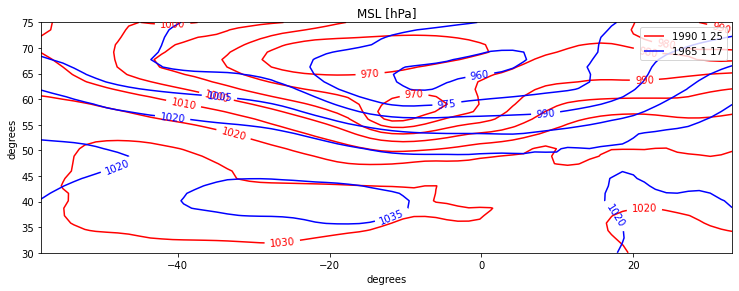

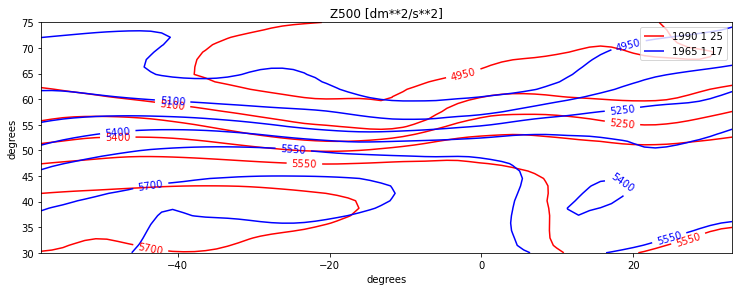

In [3]:
# for 2nd smallest: set nearby to 2
nearby = 1
min_dist_index = smallest_compressed[nearby]  
original = era20c[date_index].reshape(1,shape1,shape2,2)
nearest = era20c[min_dist_index].reshape(1,shape1,shape2,2)
isoplot(original[0,:,:,0],nearest[0,:,:,0],date,dates[min_dist_index],zone,scale[0])
isoplot(original[0,:,:,1],nearest[0,:,:,1],date,dates[min_dist_index],zone,scale[1]*10,"Z500 [dm**2/s**2]")

## 4.4 Distance in compressed and uncompressed space
The scatter plots below show:
- distances in compressed versus uncompressed (scaled combined MSL/Z500) space
- compressed distances versus average MSL distances per gridpoint [Pa] 
- compressed distances versus average Z500 distances per gridpoint [m<sup>2</sup>/s<sup>2</sup>]

The correlation of the distances is the highest between uncompressed and Z500 space.

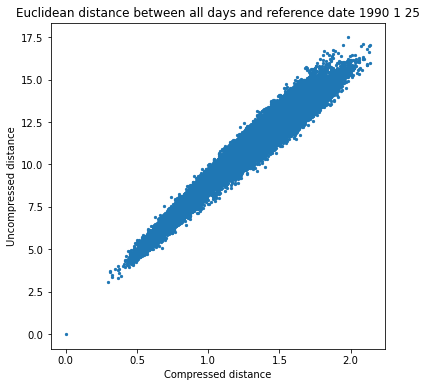

Pearson correlation coefficient: 0.972


In [4]:
plt.rcParams["figure.figsize"] = (6,6)
plt.scatter(compressed_dist, era20c_dist, s=5)
plt.ylabel("Uncompressed distance")
plt.xlabel("Compressed distance")
plt.title("Euclidean distance between all days and reference date " + date)
plt.show()
print("Pearson correlation coefficient: %.3f" % np.corrcoef(compressed_dist,era20c_dist)[0,1])

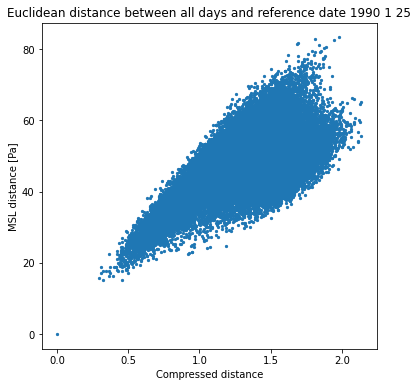

Pearson correlation coefficient: 0.637


In [5]:
plt.rcParams["figure.figsize"] = (6,6)
plt.scatter(compressed_dist, msl_dist, s=5)
plt.ylabel("MSL distance [Pa]")
plt.xlabel("Compressed distance")
plt.title("Euclidean distance between all days and reference date " + date)
plt.show()
print("Pearson correlation coefficient: %.3f" % np.corrcoef(compressed_dist,msl_dist)[0,1])

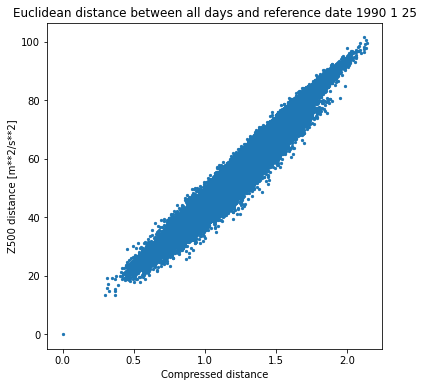

Pearson correlation coefficient: 0.979


In [6]:
plt.rcParams["figure.figsize"] = (6,6)
plt.scatter(compressed_dist, z500_dist, s=5) 
plt.ylabel("Z500 distance [m**2/s**2]")
plt.xlabel("Compressed distance")
plt.title("Euclidean distance between all days and reference date " + date)
plt.show()
print("Pearson correlation coefficient: %.3f" % np.corrcoef(compressed_dist,z500_dist)[0,1])